In [89]:
%matplotlib inline

import pandas as pd
import numpy as np
import re
import nltk
from collections import Counter
import matplotlib.pyplot as plt

In [77]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [78]:
train_data.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [79]:
print('author distribution:\n', train_data['author'].value_counts())

author distribution:
 EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64


Basic text cleaning steps - 
1. convert everything to lowercase and remove all punctuation
2. Split text into individual words
3. Remove stop words (Use standard NLTK list for the procedure)
4. Stemming (Can add explanation if you want)
5. Remove words which are very uncommon (they act as outlier, let's set minimum frequency as 2 for now)

- Retain the text from both train and test data

In [80]:
train_text = train_data['text']
test_text = test_data['text']

- Convert everything to lower case, remove any punctuation
- Replace any non alphabetical character with space

In [81]:
train_text = [re.sub(r'[^a-z]',' ',text.lower()) for text in train_text]
test_text = [re.sub(r'[^a-z]',' ',text.lower()) for text in test_text]

- Split into words

In [82]:
words = train_text + test_text
words = [line.split() for line in words]

- Remove all stopwords - Stopwords are words like i, a, the, am which don't add a lot of context to the sentence. Words like I can provide some context if authors prefer to write that way and the model may not be so accurate in that case. We will see that later. Using stanford NLTK corpus

In [83]:
stop_words = nltk.corpus.stopwords.words('english')
words = [[word for word in line if word not in stop_words] for line in words]

- Stemming - Using porter stemmer from nltk

In [84]:
stemmer = nltk.stem.porter.PorterStemmer()
words = [[stemmer.stem(word) for word in line] for line in words]

- Remove outliers (Keeping min current word frequency in bag of words count as 2)

In [88]:
min_frequency = 2

words_dict = Counter()

for line in words:
    for word in line:
        words_dict[word] += 1

words_to_remove = []

least_common_words = reversed(words_dict.most_common())

for word in least_common_words:
    if words_dict[word[0]] <= min_frequency:
        words_to_remove.append(word[0])
    else:
        break


words = [[word for word in line if word not in words_to_remove] for line in words]

- Let's look at distribution now i.e. number of words in document after cleaning up

Text(0,0.5,'Number of Documents')

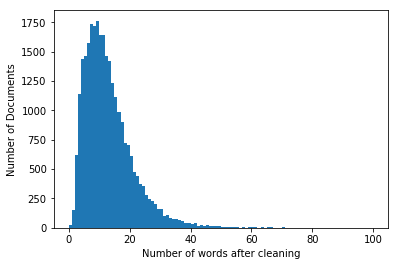

In [90]:
words_length = [len(line) for line in words]
plt.hist(words_length, bins=100, range=(0,100))
plt.xlabel('Number of words after cleaning')
plt.ylabel('Number of Documents')

- Last thing to cleanup is remove all those entries which have only one or two word left just for the sake of bag of words creation. Will be used later when training the model. 

In [92]:
min_freq = 3

words = [line for line in words if len(line) >= min_freq]

Next steps to do - 
1. Bag of Word model
2. TF-IDF
3. Vectorization
4. LDA/LSA
5. Deciding the model to use